<a href="https://colab.research.google.com/github/Sreelakshmim6/CE888/blob/main/Lab_6/Lab6_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [ ]:
n_samples = 1500 # no.of.data points 

# The dataset function is avialable in sklearn package
noisy_moons,moon_labels = datasets.make_moons(n_samples=n_samples, noise=.1) # Generate Moon Toy Dataset
noisy_circles,circle_labels = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05) # Generate Circle Toy Dataset

# noisy_moons.shape
# moon_labels.shape

In [ ]:
# Put in Array
noisy_moons=np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)

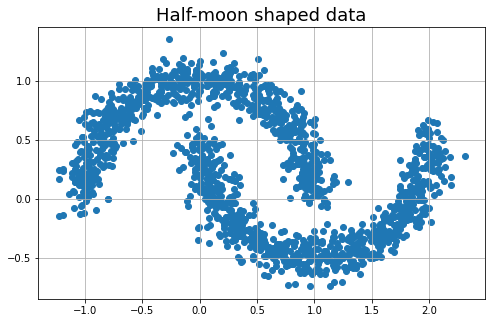

In [ ]:
# Plot Half-moon data
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1])
plt.savefig('HALF_MOON.png', dpi=300)
plt.show()

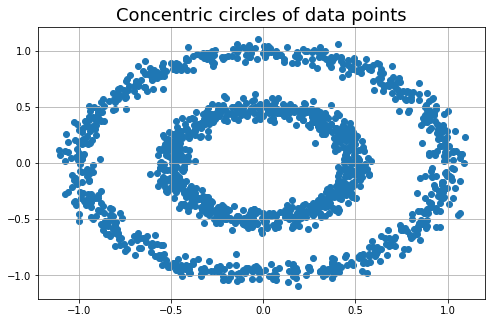

In [ ]:
# Plot Circle data
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1])
plt.savefig('CIRCLE.png', dpi=300)
plt.show()

## K-Means Clustering

 k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells.
The problem is computationally difficult (NP-hard); however, efficient heuristic algorithms converge quickly to a local optimum
K-means algorithm is very fast (one of the fastest clustering algorithms available), but it falls in local minima. That’s why it can be useful to restart it several times.

In [ ]:
# Fit K-Means Clustering on noise moon data
km=cluster.KMeans(n_clusters=2)
km.fit(noisy_moons)
km.labels_

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
print("Completeness: %0.3f" % metrics.completeness_score(moon_labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(noisy_moons, km.labels_))

Completeness: 0.198
Silhouette Coefficient: 0.483


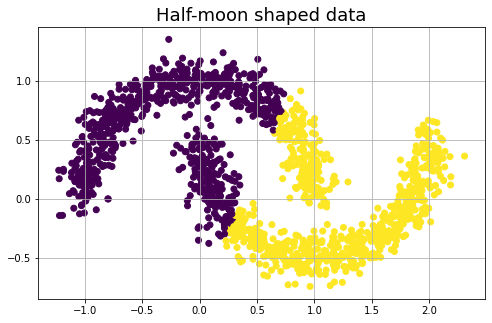

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=km.labels_)
plt.savefig('CLUSTER_MOON.png', dpi=300)
plt.show()

In [ ]:
# Fit K-Means Clustering on noise Circle data
km.fit(noisy_circles)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
print("Completeness: %0.3f" % metrics.completeness_score(circle_labels, km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(noisy_circles, km.labels_))

Completeness: 0.000
Silhouette Coefficient: 0.355


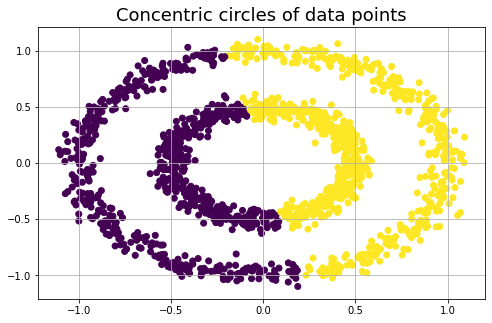

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=km.labels_)
plt.savefig('CLUSTER_CIRCLE.png', dpi=300)
plt.show()

###  Disadvanatges of K-Means Clustering

##### 1) Difficult to predict K-Value.
##### 2) With global cluster, it didn't work well.
##### 3) Different initial partitions can result in different final clusters.

## DBSCAN 

Density-based spatial clustering of applications with noise (DBSCAN) is a data clustering algorithm. It is a density-based clustering algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

In [ ]:
# Fit DBSCAN Clustering on noise moon data
dbs = cluster.DBSCAN(eps=0.1) # The maximum distance between two samples for them to be considered as in the same neighborhood.
dbs.fit(noisy_moons)
dbs.labels_

array([0, 0, 1, ..., 1, 1, 0])

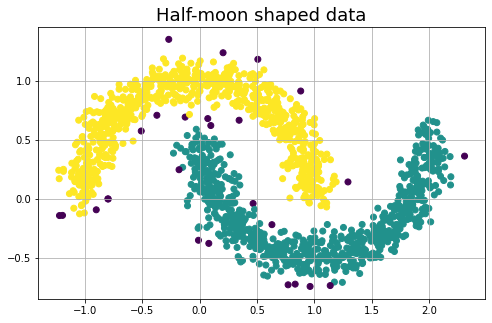

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Half-moon shaped data", fontsize=18)
plt.grid(True)
plt.scatter(noisy_moons[:,0],noisy_moons[:,1],c=dbs.labels_)
plt.savefig('DBSCAN_MOON.png', dpi=300)
plt.show()

In [ ]:
# Fit DBSCAN Clustering on noise Circle data
dbs.fit(noisy_circles)
dbs.labels_

array([0, 1, 1, ..., 1, 1, 0])

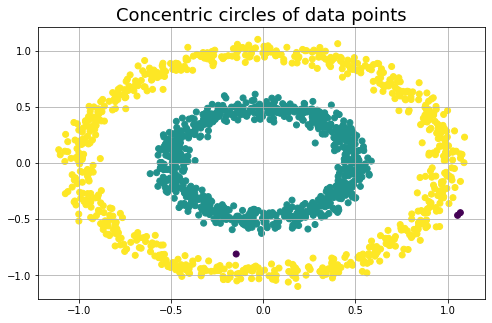

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Concentric circles of data points", fontsize=18)
plt.grid(True)
plt.scatter(noisy_circles[:,0],noisy_circles[:,1],c=dbs.labels_)
plt.savefig('BSCAN_CIRCLE.png', dpi=300)
plt.show()

# PCA on Moon Data

In [ ]:
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
noisy_moons_spca = scikit_pca.fit_transform(noisy_moons)

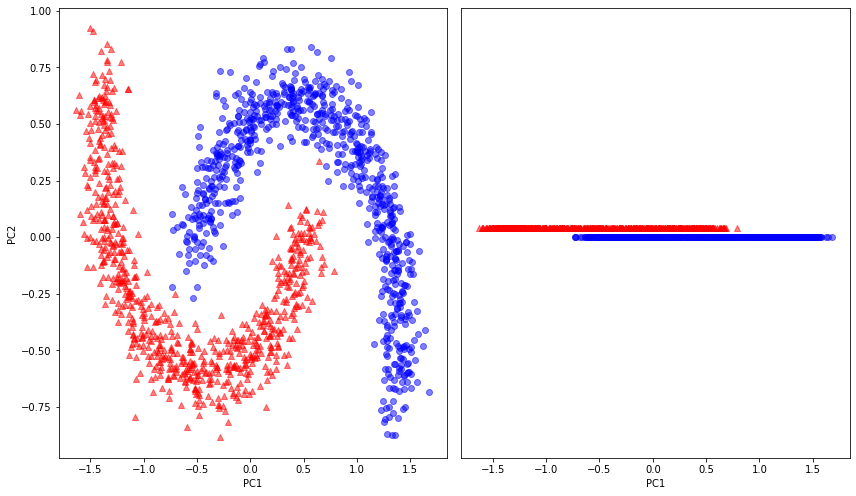

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))

ax[0].scatter(noisy_moons_spca[moon_labels == 0, 0], noisy_moons_spca[moon_labels == 0, 1],
              color='red', marker='^', alpha=0.5)
ax[0].scatter(noisy_moons_spca[moon_labels == 1, 0], noisy_moons_spca[moon_labels == 1, 1],
              color='blue', marker='o', alpha=0.5)

ax[1].scatter(noisy_moons_spca[moon_labels == 0, 0], np.zeros((750, 1)) + 0.02,
              color='red', marker='^', alpha=0.5)
ax[1].scatter(noisy_moons_spca[moon_labels == 1, 0], np.zeros((750, 1)) - 0.02,
              color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')

plt.tight_layout()
plt.savefig('PCA_MOON.png', dpi=300)
plt.show()

          0         1
0  1.000000 -0.438258
1 -0.438258  1.000000


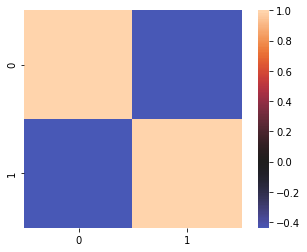

In [ ]:
# Compute the correlation matrix before doing PCA
nm=pd.DataFrame(noisy_moons)
pca_corr=nm.corr()
print(pca_corr)
sns.heatmap(pca_corr, vmax=1, center=0, square=True)
plt.savefig('CORR_PCA.png', dpi=300)

              0             1
0  1.000000e+00 -7.228359e-17
1 -7.228359e-17  1.000000e+00


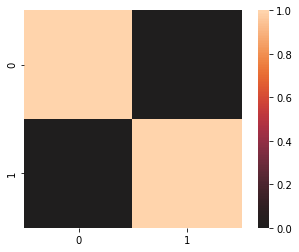

In [ ]:
# Compute the correlation matrix after doing PCA
nmp=pd.DataFrame(noisy_moons_spca)
corr_pca=nmp.corr()
print(corr_pca)
sns.heatmap(corr_pca, vmax=1, center=0, square=True)
plt.savefig('PCA_CORR.png', dpi=300)

In [ ]:
from sklearn.decomposition import KernelPCA
scikit_kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
noisy_moons_kpca = scikit_kpca.fit_transform(noisy_moons)

              0             1
0  1.000000e+00 -1.192829e-17
1 -1.192829e-17  1.000000e+00


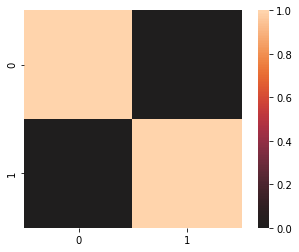

In [ ]:
# Compute the correlation matrix after doing PCA

kmp=pd.DataFrame(noisy_moons_kpca)
corr_kpca=kmp.corr()
print(corr_kpca)
sns.heatmap(corr_kpca, vmax=1, center=0, square=True)
plt.savefig('KPCA_CORR.png', dpi=300)

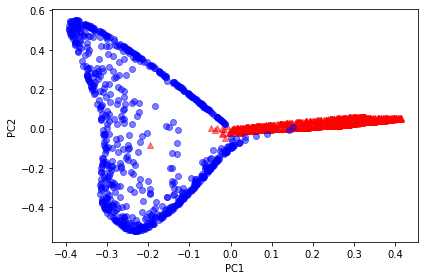

In [ ]:
plt.scatter(noisy_moons_kpca[moon_labels == 0, 0], noisy_moons_kpca[moon_labels == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(noisy_moons_kpca[moon_labels == 1, 0], noisy_moons_kpca[moon_labels == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.savefig('KPCA_MOON.png', dpi=300)

# Outlier detection

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_moons)
y_pred_train = clf.predict(noisy_moons)

pos = y_pred_train > 0
neg = y_pred_train < 0


1485
15


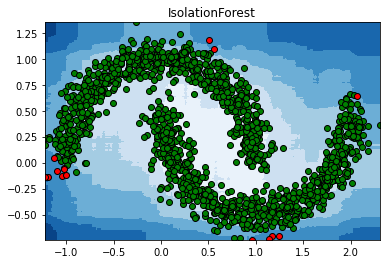

In [ ]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((noisy_moons[:, 0])), max((noisy_moons[:, 0])), 500), np.linspace(min((noisy_moons[:, 1])), max((noisy_moons[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_moons[pos][:, 0], noisy_moons[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_moons[neg][:, 0], noisy_moons[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_MOON.png', dpi=300)
print(pos.sum())
print(neg.sum())

In [ ]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples=100, contamination = 0.01)
clf.fit(noisy_circles)
y_pred_train = clf.predict(noisy_circles)

pos = y_pred_train > 0
neg = y_pred_train < 0

1485
15


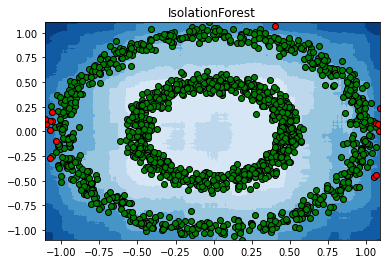

In [ ]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(min((noisy_circles[:, 0])), max((noisy_circles[:, 0])), 500), 
                     np.linspace(min((noisy_circles[:, 1])), max((noisy_circles[:, 1])), 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(noisy_circles[pos][:, 0], noisy_circles[pos][:, 1], c='green', edgecolor='k')
b2 = plt.scatter(noisy_circles[neg][:, 0], noisy_circles[neg][:, 1], c='red', edgecolor='k')

plt.axis('tight')

plt.xlim((xx.min(), xx.max()))
plt.ylim((yy.min(), yy.max()))

plt.savefig('OUTLIER_CIRCLE.png', dpi=300)
print(pos.sum())
print(neg.sum())

# Clustering and PCA on wine Dataset

In [ ]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()
#df_wine.to_csv('WindeData.csv')

URLError: ignored

## Task 1: Check the counts of each wine class

In [ ]:
df_wine['Class label'].value_counts()

In [ ]:
# Fetch data into x and y variables
x=df_wine.iloc[:,1:14] # Covariates or input
y=df_wine.iloc[:,:1] # Labels or classes or output
print(x.columns)
print(y.columns)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')
Index(['Class label'], dtype='object')


## Task 2: Cluster the data using K Means Algorithm

In [ ]:
# Write your code here for task 2
from sklearn.cluster import KMeans
km= KMeans(n_clusters=3)
km.fit(x)
km.labels_




array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int32)

In [ ]:
y_pred=km.predict(x)
print(y_pred)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


In [ ]:
print("Completeness: %0.3f" % metrics.completeness_score(y['Class label'], km.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(x, km.labels_))

Completeness: 0.429
Silhouette Coefficient: 0.571


## Task 3: Scatter plot the data into 3 classes based on True lables and plot with legends. 


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(x.iloc[:, 1:3])
x.iloc[:, 1:3] = imputer.transform(x.iloc[:, 1:3])

No handles with labels found to put in legend.


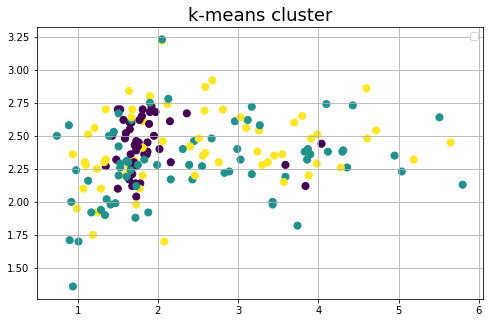

In [ ]:
plt.figure(figsize=(8,5))
plt.title("k-means cluster", fontsize=18)
plt.grid(True)
plt.scatter(x.iloc[:,1],x.iloc[:,2], c=y_predict,s=50)
plt.legend()
plt.show()

## Task 4: Use cluster model labels to group them in predicted classes

In [ ]:
# Write your code here for task 4

values, counts = np.unique(km.labels_, return_counts=True)
counts

array([47, 69, 62])

In [ ]:
# Now we have splitted the data into 70:30 training and test subsets, respectively.

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
print(pd.value_counts(pd.Series(y)))
print(pd.value_counts(pd.Series(y_train)))
print(pd.value_counts(pd.Series(y_test)))

2    71
1    59
3    48
dtype: int64
2    50
1    41
3    33
dtype: int64
2    21
1    18
3    15
dtype: int64


In [ ]:
# Standardizing the data
# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# Dimensionality reduction: Principal component analysis using scikit-learn

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

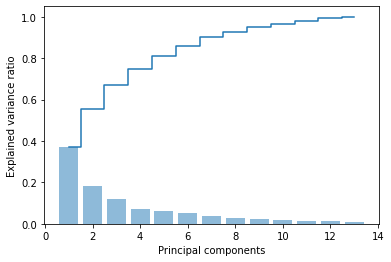

In [ ]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.savefig('PCA_WINE.png', dpi=300)
plt.show()

## Task 5: Apply PCA with `n_components=2` on `X_train_std` data and transform test data accordingly

In [ ]:
# Complete this code for task 5
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

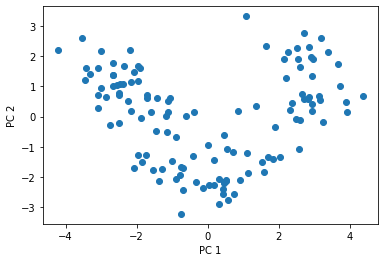

In [ ]:
# Plot the first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.savefig('PCA_WINE_ULBL.png', dpi=300)
plt.show()

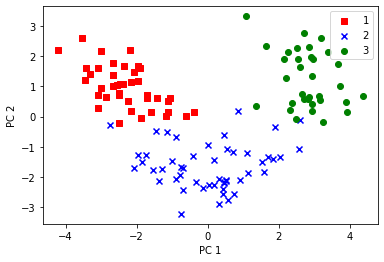

In [ ]:
# Plot of two best principal components using y_train data
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.legend()
    plt.savefig('PCA_WINE_LBL.png', dpi=300)

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

###  Training logistic regression classifier using the first 2 principal components.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


## Task 6: Apply Logistic Regression on training features and predict test features



In [ ]:
# Task 6: Complete the code below and fill the code for plot in the cell given below:
logR = LogisticRegression()
logR = logR.fit(X_train_pca,y_train) # Train a Logistic regression model
pred_lab=logR.predict(X_test_pca) # Test on the test data
print("Accuracy on test is = %f" % (100 * accuracy_score(y_test, pred_lab)))

Accuracy on test is = 92.592593


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


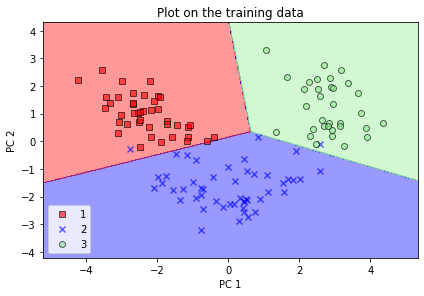

In [ ]:
# Plot the decision region on training features and test labels using classifier you have trained above
plot_decision_regions(X_train_pca,y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the training data')
plt.savefig('TRAIN_CLASS.png', dpi=300)

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


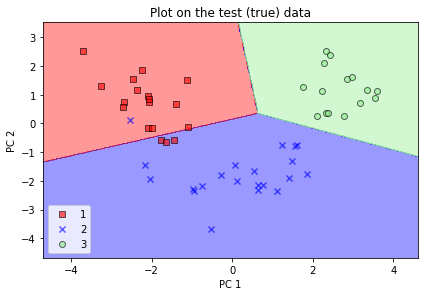

In [ ]:
#  Plot the decision region on test features and true labels using classifier you have trained above
plot_decision_regions(X_test_pca,y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.title('Plot on the test (true) data')
plt.savefig('TEST_CLASS_TRUE.png', dpi=300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


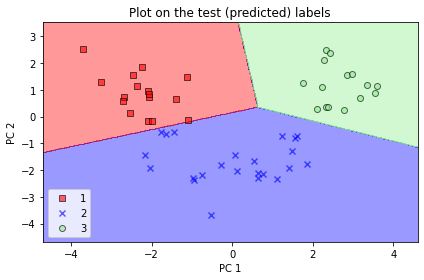

In [ ]:
#  Plot the decision region on test features and predicted labels using classifier you have trained above
plot_decision_regions(X_test_pca, pred_lab, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.title('Plot on the test (predicted) labels')
plt.tight_layout()
plt.savefig('TEST_CLASS.png', dpi=300)
plt.show()

## Lab 6: Exercise to be completed

### Task 7: To complete this task, please create a new notebook in Google Colab. 

Note: Please create a new notebook for this task.

Your data is stored in Lab_6/Data folder. There are two .csv files: 1) Country-data.csv and 2) data-dictionary.csv. Please explore the data and use any clustering method to find the list of countries, which can categorised as follows:

| S.No      | Categories |
| ----------- | ----------- |
| 1   | under-developing country |
| 2   | developing country       |
| 3   | developed country        |


Note: please justify your reason, why and how you have concluded your answer. 